In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

path1 = "/Users/mitchellostrow/Desktop/Projects/SLT/9520_recurrent_networks/analysis/data/wandb_export_2025-11-24T10_30_04.991-05_00.csv"
path2 = "/Users/mitchellostrow/Desktop/Projects/SLT/9520_recurrent_networks/analysis/data/wandb_export_2025-11-24T10_30_12.187-05_00.csv"
path3 = "/Users/mitchellostrow/Desktop/Projects/SLT/9520_recurrent_networks/analysis/data/wandb_export_2025-11-24T10_30_19.276-05_00.csv"

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df1.columns, df2.columns,df3.columns

(Index(['Name', 'features/nonlinearity_active_fraction', 'accuracy',
        'model.hidden_dim', '_wandb'],
       dtype='object'),
 Index(['Name', 'features/frobenius_mean', 'accuracy', 'model.hidden_dim',
        '_wandb'],
       dtype='object'),
 Index(['Name', 'features/nonlinearity_scale_mean', 'accuracy',
        'model.hidden_dim', '_wandb'],
       dtype='object'))

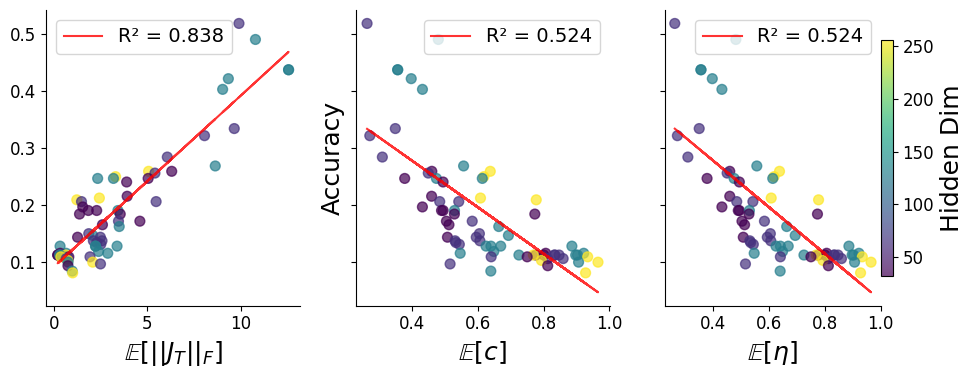

In [17]:
import scipy.stats as stats

fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

# Set larger font sizes
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'axes.titlesize': 24})
plt.rcParams.update({'axes.labelsize': 18})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

# df1: nonlinearity_active_fraction vs accuracy
x1 = df1['features/nonlinearity_active_fraction']
y1 = df1['accuracy']
scatter1 = axes[1].scatter(x1, y1, c=df1['model.hidden_dim'], cmap='viridis', s=50, alpha=0.7)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1, y1)
line1 = axes[1].plot(x1, intercept1 + slope1 * x1, 'r-', alpha=0.8, label=f'R² = {r_value1**2:.3f}')
axes[1].set_xlabel(r'$\mathbb{E}[c]$')
axes[1].set_ylabel('Accuracy')
# axes[0].set_title('Nonlinearity Active Fraction vs Accuracy')
axes[1].legend(loc='best')

# Remove top and right spines
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# df2: frobenius_mean vs accuracy
x2 = df2['features/frobenius_mean']
y2 = df2['accuracy']
scatter2 = axes[0].scatter(x2, y2, c=df2['model.hidden_dim'], cmap='viridis', s=50, alpha=0.7)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)
line2 = axes[0].plot(x2, intercept2 + slope2 * x2, 'r-', alpha=0.8, label=f'R² = {r_value2**2:.3f}')
axes[0].set_xlabel(r'$\mathbb{E}[||J_T||_F]$')
# axes[1].set_title('Frobenius Mean vs Accuracy')
axes[0].legend(loc='best')

# df3: 1 - nonlinearity_scale_mean vs accuracy
x3 = 1 - df3['features/nonlinearity_scale_mean']
y3 = df3['accuracy']
scatter3 = axes[2].scatter(x3, y3, c=df3['model.hidden_dim'], cmap='viridis', s=50, alpha=0.7)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x3, y3)
line3 = axes[2].plot(x3, intercept3 + slope3 * x3, 'r-', alpha=0.8, label=f'R² = {r_value3**2:.3f}')
axes[2].set_xlabel(r'$\mathbb{E}[\eta]$')
# axes[2].set_title('1 - Nonlinearity Scale Mean vs Accuracy')
axes[2].legend(loc='best')

# Single colorbar on the right
cbar = plt.colorbar(scatter1, ax=axes[2], label='Hidden Dim', shrink=0.8, pad=0.0)

plt.tight_layout()
plt.show()
